In [277]:
import pandas as pd
import numpy as np
import re

In [278]:
!pip install konlpy

You should consider upgrading via the '/Users/woowonjin/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [279]:
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [280]:
data_1 = pd.read_csv("0819.csv", dtype=str)

In [281]:
data_1 = data_1[["contents", "sarcasm"]]
data_1 = data_1[["contents", "sarcasm"]]
print(data_1)

                                                contents sarcasm
0             이런식으로 검색어 올려서 인기인좀 되보시려고 그러나?\n듣보잡이라 별관심없음       0
1         그럼 대통령 비서들이 제위치에 가져다 두지 그랬냐? 아.. 안와서 못했구나 끄덕끄덕       1
2       나는 이런 저질기사가 아직도 네이버 상단기사에 걸려있는것이 궁금하다???????????       0
3      글도 어렵지만 이런 기사는 수십년전 부터 들어왔다. 암이 왜 왔는가! 비교적 몸이 ...       0
4                          와....공산당. 막강 권력 마구마구 휘둘러버려~~~       1
...                                                  ...     ...
16766  지바:  김한화?   일본프로야구 최초 6연타석 삼진 당하고 지진 핑계도 모자라서 ...       0
16767                 지랄하고있네. 개성공단에 마스크 시설만드는데 얼마나 걸리는데.       0
16768                          한창도 해설위원 - 관중들이 피펜을 연호합니다       1
16769                                 옐리치랑 맞짱 뜨는거 기대된다 .       0
16770                                              광고 ㄷㄷ       1

[16771 rows x 2 columns]


In [282]:
data_2 = pd.read_csv("0903.csv", dtype=str)
data_2 = data_2[["contents", "sarcasm"]]
data_2

,contents,sarcasm
0,자식문제있는 사람은 공직에서 물러나야지 쯔쯔...,0
1,판사놈 면상이 궁금하구만,1
2,ㅂㄹ을 뗘서 개나 줘버려라 ᆢ개도 안먹겠지 ㅅㅂ,1
3,장용준 집행유예가고장제원 사퇴하자사학재벌 집안 기레기들,0
4,역시 꼰대보수 클라스~~,1
...,...,...
9081,40대가 아직 대가리가 덜 깨졌구나,NaN
9082,모를수도있지않나,NaN
9083,우리나라가 그렇죠 뭐. 최종범도 무혐의떴는데ㅋ,NaN
9084,허경영총재의 국가혁명배당금당도 넣고 함 해보죠,NaN


In [283]:
data_2 = data_2.dropna(axis=0)
data_1 = data_1.dropna(axis=0)
print(data_2)

                              contents sarcasm
0          자식문제있는 사람은 공직에서 물러나야지 쯔쯔...       0
1                        판사놈 면상이 궁금하구만       1
2           ㅂㄹ을 뗘서 개나 줘버려라 ᆢ개도 안먹겠지 ㅅㅂ       1
3       장용준 집행유예가고장제원 사퇴하자사학재벌 집안 기레기들       0
4                        역시 꼰대보수 클라스~~       1
...                                ...     ...
8495                 21-22시즌 후에 FA인데요?       0
8496  진짜 웃긴다. 이사람은 어디에 끈이 없었나 바로 징역이네.       1
8497                              휘성은?       0
8498                  이승현 타팀팬으로써 응원합니다       2
8499               근데 성매매는 왜..? ㅋㅋㄱㅋㄱㅋ       1

[4844 rows x 2 columns]


In [284]:
data_1

,contents,sarcasm
0,이런식으로 검색어 올려서 인기인좀 되보시려고 그러나?\n듣보잡이라 별관심없음,0
1,그럼 대통령 비서들이 제위치에 가져다 두지 그랬냐? 아.. 안와서 못했구나 끄덕끄덕,1
2,나는 이런 저질기사가 아직도 네이버 상단기사에 걸려있는것이 궁금하다???????????,0
3,글도 어렵지만 이런 기사는 수십년전 부터 들어왔다. 암이 왜 왔는가! 비교적 몸이 ...,0
4,와....공산당. 막강 권력 마구마구 휘둘러버려~~~,1
...,...,...
16766,지바: 김한화? 일본프로야구 최초 6연타석 삼진 당하고 지진 핑계도 모자라서 ...,0
16767,지랄하고있네. 개성공단에 마스크 시설만드는데 얼마나 걸리는데.,0
16768,한창도 해설위원 - 관중들이 피펜을 연호합니다,1
16769,옐리치랑 맞짱 뜨는거 기대된다 .,0


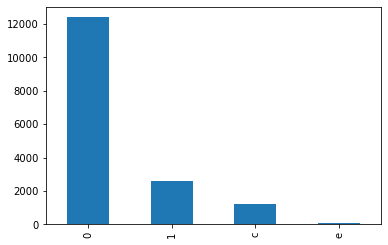

In [285]:
data_1["sarcasm"].value_counts().plot(kind="bar")

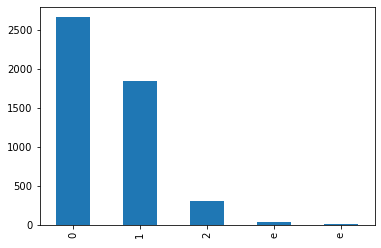

In [286]:
data_2["sarcasm"].value_counts().plot(kind="bar")

In [287]:
data_1 = data_1[(data_1["sarcasm"] == "0")|(data_1["sarcasm"] == "1")]
data_2 = data_2[(data_2["sarcasm"] == "0")|(data_2["sarcasm"] == "1")]

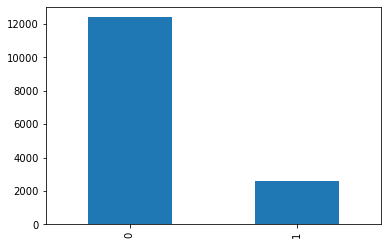

In [288]:
data_1["sarcasm"].value_counts().plot(kind="bar")

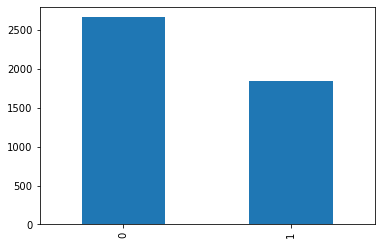

In [289]:
data_2["sarcasm"].value_counts().plot(kind="bar")

In [290]:
okt = Okt()

In [291]:
data_1.shape

(14990, 2)

In [292]:
data_2.shape

(4509, 2)

In [293]:
data_all = pd.concat([data_1, data_2])
data_all

,contents,sarcasm
0,이런식으로 검색어 올려서 인기인좀 되보시려고 그러나?\n듣보잡이라 별관심없음,0
1,그럼 대통령 비서들이 제위치에 가져다 두지 그랬냐? 아.. 안와서 못했구나 끄덕끄덕,1
2,나는 이런 저질기사가 아직도 네이버 상단기사에 걸려있는것이 궁금하다???????????,0
3,글도 어렵지만 이런 기사는 수십년전 부터 들어왔다. 암이 왜 왔는가! 비교적 몸이 ...,0
4,와....공산당. 막강 권력 마구마구 휘둘러버려~~~,1
...,...,...
8494,ㅋㅋㅋㅋㅋㅋㅋㅋㅋ 개소리를 정성들여 하는구나 ㅋㅋㅋㅋㅋㅋㅋㅋㅋ,1
8495,21-22시즌 후에 FA인데요?,0
8496,진짜 웃긴다. 이사람은 어디에 끈이 없었나 바로 징역이네.,1
8497,휘성은?,0


In [294]:
from sklearn.model_selection import train_test_split

In [295]:
x, x_t, y_train, y_test = train_test_split(data_all["contents"], data_all["sarcasm"], test_size=0.1, shuffle=True)

In [296]:
x

2436     ㅈㄹ 늦었다  모든  일에는  적절한  타이밍이  있는거다  정말  승리는  애초 ...
12764                                         진짜 개 빨갱이 새리들
15227    와 이새끼 진짜 개철면피네... 니 때문에 안 좋았던거 우한폐렴때문에 더 망한건데 ...
15308    공매도 기간내 강제 환매 안하는 이상 아무 의미없다... 지금은 공매도 치기도 무서...
11748                           웅 걔네가 빨갱이간첩새끼 문제앙보단 나은듯ㅋㅋㅋ
                               ...                        
12946    초2때보고 아무감흥도 없이 액션씬 재밋게봤는데...지금다시보니 소름...요즘 이런영...
7663                                  정준영 빠던 놈들 빙구같은 것들 ㅉㅉ
7616                              심판매수만 아니었어도 키르기 승인데 심판ㅅㄲ
4988             기아는 뭐 두산 승점 자판기냐 와 진짜 갑갑하네 두산만 만나면 고양이가되냐
9680                                 벌레들 진짜 부지런히 악플달러 또 왔네
Name: contents, Length: 17549, dtype: object

In [297]:
x_train = []
for sentence in x:
    x_temp = okt.morphs(sentence, stem=True)
    x_train.append(x_temp)

In [298]:
x_train[:3]

[['ㅈㄹ',
  '늦다',
  '모든',
  '일',
  '에는',
  '적절하다',
  '타이밍',
  '이',
  '있다',
  '정말',
  '승리',
  '는',
  '애초',
  '아무렇다',
  '상관없다',
  '문제',
  '이다',
  '진작',
  '에',
  '책임감',
  '을',
  '갖다',
  '앞',
  '에',
  '나서다',
  '요리조리',
  '피',
  '하다',
  '꼼수',
  '너무',
  '티',
  '나다',
  'YG',
  '계속',
  '홍보',
  '하다',
  '웃기',
  '고',
  'ㅉㅉ'],
 ['진짜', '개', '빨갱이', '새', '리', '들'],
 ['오다',
  '이',
  '새끼',
  '진짜',
  '개',
  '철면피',
  '네',
  '...',
  '니',
  '때문',
  '에',
  '안',
  '좋다',
  '우한',
  '폐렴',
  '때문',
  '에',
  '더',
  '망하다',
  '뭐',
  '?',
  '우한',
  '폐렴',
  '으로',
  '몰다',
  '빵',
  '하고',
  '있다',
  'ㅋㅋㅋㅋㅋㅋㅋㅋ',
  '니',
  '새끼',
  '가',
  '우한',
  '폐렴',
  '이전',
  '에',
  '경제',
  '가',
  '안',
  '좋다',
  '죄송하다',
  '이런',
  '말',
  '한마디',
  '해',
  '본적',
  '있다',
  '?']]

In [299]:
x_test = []

In [300]:
for sentence in x_t:
    x_temp = okt.morphs(sentence, stem=True)
    x_test.append(x_temp)

In [301]:
x_test[:3]

[['사람', '새끼', '냐', '...'],
 ['리니지', '의', '맛', '이', '어떻다', '맛', '인가요', '?'],
 ['결국', '엔', '얻다', '내다', '..']]

In [302]:
tokenizer = Tokenizer()

In [303]:
tokenizer.fit_on_texts(x_train)

In [304]:
tokenizer.word_index

{'하다': 1,
 '이': 2,
 '.': 3,
 '들': 4,
 '?': 5,
 '가': 6,
 '에': 7,
 '은': 8,
 '도': 9,
 '을': 10,
 '..': 11,
 '는': 12,
 '보다': 13,
 '...': 14,
 '없다': 15,
 '다': 16,
 '의': 17,
 '를': 18,
 '있다': 19,
 ',': 20,
 '아니다': 21,
 '쓰레기': 22,
 '되다': 23,
 '한': 24,
 '으로': 25,
 '이다': 26,
 '로': 27,
 '아': 28,
 '안': 29,
 '못': 30,
 '진짜': 31,
 '같다': 32,
 '만': 33,
 '새끼': 34,
 '사람': 35,
 '네': 36,
 '고': 37,
 '들다': 38,
 '니': 39,
 '!': 40,
 '에서': 41,
 '왜': 42,
 '개': 43,
 '것': 44,
 '나': 45,
 '하고': 46,
 '놈': 47,
 '~': 48,
 '그': 49,
 '영화': 50,
 '라': 51,
 '게': 52,
 '그렇다': 53,
 '뭐': 54,
 '말': 55,
 'ㅋㅋ': 56,
 '좀': 57,
 '나오다': 58,
 '가다': 59,
 '적': 60,
 '않다': 61,
 '좋다': 62,
 '저': 63,
 '야': 64,
 '\n': 65,
 '받다': 66,
 '지': 67,
 'ㅉㅉ': 68,
 '더': 69,
 '돈': 70,
 '이렇다': 71,
 '인': 72,
 '그냥': 73,
 '생각': 74,
 '냐': 75,
 '거': 76,
 '먹다': 77,
 'ㅋㅋㅋ': 78,
 '하': 79,
 '내': 80,
 '....': 81,
 '때': 82,
 '과': 83,
 '이나': 84,
 '알다': 85,
 '지다': 86,
 '시키다': 87,
 '쓰다': 88,
 '치다': 89,
 '까지': 90,
 '인간': 91,
 '!!': 92,
 '일': 93,
 '너': 94,
 '이네': 95,
 '기사'

In [305]:
len(tokenizer.word_index)

21249

In [306]:
threshold = 3
total_cnt = len(tokenizer.word_index)
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합
for key, value in tokenizer.word_counts.items():
    total_freq += value
    
    if(value < threshold):
        rare_cnt += 1
        rare_freq += value

In [307]:
print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 21249
등장 빈도가 2번 이하인 희귀 단어의 수: 13449
단어 집합에서 희귀 단어의 비율: 63.29239023012848
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.9571156839010895


In [308]:
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)


단어 집합의 크기 : 7802


In [309]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(x_train)
X_train = tokenizer.texts_to_sequences(x_train)
X_test = tokenizer.texts_to_sequences(x_test)

In [310]:
X_train

[[387,
  1481,
  346,
  94,
  347,
  2854,
  3375,
  3,
  20,
  125,
  272,
  13,
  1037,
  1482,
  1642,
  155,
  27,
  1698,
  8,
  4093,
  11,
  752,
  355,
  8,
  767,
  1,
  519,
  2,
  2479,
  120,
  1090,
  141,
  987,
  331,
  1534,
  2,
  963,
  38,
  69],
 [32, 44, 283, 113, 674, 5],
 [114,
  3,
  35,
  32,
  44,
  4094,
  37,
  15,
  40,
  178,
  8,
  30,
  63,
  1038,
  1483,
  178,
  8,
  70,
  230,
  55,
  6,
  1038,
  1483,
  26,
  964,
  1423,
  47,
  20,
  1065,
  40,
  35,
  7,
  1038,
  1483,
  1854,
  8,
  463,
  7,
  30,
  63,
  1535,
  145,
  56,
  861,
  126,
  3702,
  20,
  6],
 [1855,
  2320,
  81,
  899,
  1,
  30,
  2,
  351,
  451,
  753,
  16,
  15,
  128,
  9,
  1855,
  2177,
  10,
  348,
  1262,
  4,
  312,
  543,
  1963,
  4095,
  13,
  3106,
  5,
  1,
  464,
  2660,
  2,
  1,
  167,
  111,
  4,
  29,
  15,
  166,
  3,
  1,
  3106,
  5,
  5270,
  31,
  586,
  356,
  796,
  421,
  342,
  26,
  2855,
  15],
 [5271, 6259, 7, 283, 1263, 35, 155, 1856, 1198, 

In [311]:
y_train = np.array(y_train, dtype=float)

In [312]:
y_test = np.array(y_test, dtype=float)

In [313]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [314]:
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

17549
17549


In [315]:
import matplotlib.pyplot as plt

리뷰의 최대 길이 : 158
리뷰의 평균 길이 : 15.817653427545729


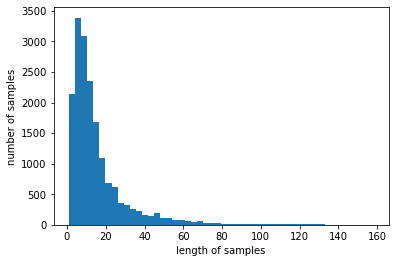

In [316]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [317]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [318]:
max_len = 40
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 40 이하인 샘플의 비율: 92.90557866545103


In [319]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [320]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [325]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
# rmsprop
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.1)

Epoch 1/15
263/264 [============================>.] - ETA: 0s - loss: 0.4833 - acc: 0.7843
Epoch 00001: val_acc improved from -inf to 0.80228, saving model to best_model.h5
264/264 [==============================] - 9s 35ms/step - loss: 0.4832 - acc: 0.7843 - val_loss: 0.4448 - val_acc: 0.8023
Epoch 2/15
262/264 [============================>.] - ETA: 0s - loss: 0.4068 - acc: 0.8162
Epoch 00002: val_acc did not improve from 0.80228
264/264 [==============================] - 9s 34ms/step - loss: 0.4066 - acc: 0.8163 - val_loss: 0.4530 - val_acc: 0.7937
Epoch 3/15
263/264 [============================>.] - ETA: 0s - loss: 0.3755 - acc: 0.8325
Epoch 00003: val_acc did not improve from 0.80228
264/264 [==============================] - 9s 33ms/step - loss: 0.3755 - acc: 0.8326 - val_loss: 0.4478 - val_acc: 0.8023
Epoch 4/15
263/264 [============================>.] - ETA: 0s - loss: 0.3538 - acc: 0.8430
Epoch 00004: val_acc did not improve from 0.80228
264/264 [=============================

In [326]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

61/61 [==============================] - 1s 9ms/step - loss: 0.4445 - acc: 0.7969

 테스트 정확도: 0.7969


In [327]:
def sentiment_predict(new_sentence):
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
#   new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 비꼬는 댓글입니다.\n".format(score * 100))
  else:
    print("{:.2f}% 확률로 비꼬는 댓글이 아닙니다.\n".format((1 - score) * 100))

In [333]:
sentiment_predict("ㅋㅋㅋ")

65.69% 확률로 비꼬는 댓글입니다.

